### Import packages:
    - csv 
    - networkx
    - pandas
    - matplotlib
    
    

In [59]:
import csv
import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

Create an empty graph and store in G: through a graph constructor 

In [60]:
G = nx.Graph()

In [61]:
G.add_node(1)
G.add_nodes_from([2,3])
G.add_node(4)

Returns an iterable: can use list method to convert to list 

In [62]:
y = list(G.nodes())
y

[1, 2, 3, 4]

#### Add edges to the graph

In [63]:
G.add_edge(1,2)

#### Print information about the graph

In [64]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 1
Average degree:   0.5000


#### Draw the graph

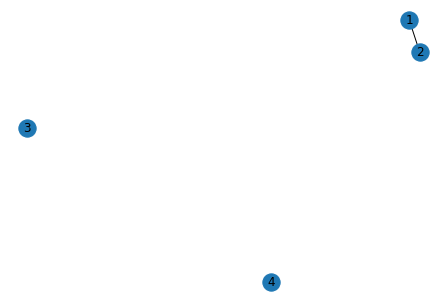

In [65]:
nx.draw(G,with_labels=True) #with_labels -> node numbers are displayed

#### Add attributes to nodes

In [66]:
G.add_node(5, fav_col = 'blue')

G.add_nodes_from([(6,{'fav_color': 'red'}),
            (7,{'fav_color' : 'purple'})])

G.add_edge(6,7,relation= 'besties')


#### Inspecting attributes

In [67]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 7
Number of edges: 2
Average degree:   0.5714


In [68]:
print('Node 5 attributes',G.nodes[5])
print('Edge all attributes',G.edges(data=True))
print('Edge 5-6 attributes',G.edges([5,6],data=True))

Node 5 attributes {'fav_col': 'blue'}
Edge all attributes [(1, 2, {}), (6, 7, {'relation': 'besties'})]
Edge 5-6 attributes [(6, 7, {'relation': 'besties'})]


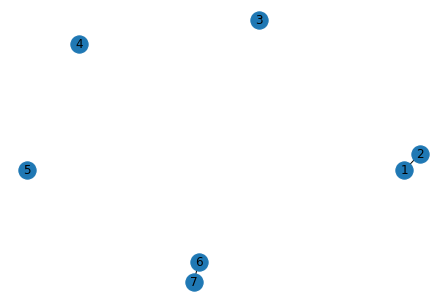

In [69]:
nx.draw(G,with_labels=True) #with_labels -> node numbers are displayed

### Adding attributes for existing nodes

In [72]:
fav_foods = {
    1: 'pizza',
    2: 'mac and cheese'
}

In [75]:
nx.set_node_attributes(G,fav_foods,'favorite_food')

In [77]:
print('Node 2 favorite food is:',G.nodes[1]['favorite_food'])

Node 2 favorite food is: pizza


### Reading in different representations of graphs

Data for graphs and networks comes in different representations:
- Edge list
- Adj Matrix
- Adj List (not covered)
- Incidence Matrix

- This tutorial will load from files, but you can use json, gexf and other formats


### Edge list:

Represented as a list of tuples: edge between two nodes 

Weighted: if value added 3rd column 
Directed:  to and from given


In [79]:
!head data/ga_edgelist.csv

"from","to"
"lexi","sloan"
"lexi","karev"
"owen","yang"
"owen","altman"
"sloan","torres"
"sloan","altman"
"torres","arizona"
"torres","karev"
"derek","grey"


In [80]:
edges = []
with open('data/ga_edgelist.csv','r') as f:
    filereader = csv.reader(f,delimiter=",",quotechar='"')
    next(filereader)
    for row in filereader:
        edges.append(row)


In [81]:
edges[0:5]

[['lexi', 'sloan'],
 ['lexi', 'karev'],
 ['owen', 'yang'],
 ['owen', 'altman'],
 ['sloan', 'torres']]

#### Creates a graph object from your edge list

In [82]:
GA = nx.from_edgelist(edges)

In [83]:
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


### Mediating Data processing through pandas

In [86]:
ga_edges = pd.read_csv('data/ga_edgelist.csv')
ga_edges.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


In [88]:
GA = nx.from_pandas_edgelist(ga_edges,source='from',target='to')

In [89]:
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


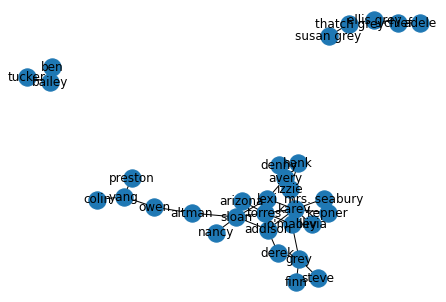

In [90]:
nx.draw(GA, with_labels=True)

### Adjacency matrix

In [99]:
ga_adj = pd.read_csv('data/ga_adj.csv', index_col = 0)
ga_adj.iloc[0:5,0:5]

,denny,kepner,grey,colin,finn
denny,0.0,0.0,0.0,0.0,0.0
kepner,0.0,0.0,0.0,0.0,0.0
grey,0.0,0.0,0.0,0.0,1.0
colin,0.0,0.0,0.0,0.0,0.0
finn,0.0,0.0,1.0,0.0,0.0


In [100]:
GAAdj = nx.from_numpy_matrix(ga_adj.values)

In [101]:
# Numpy matrix don't have labels
print(GAAdj.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [102]:
# Map labels 
label_mapping = dict(zip(GAAdj.nodes(),ga_adj.columns))
GAAdj = nx.relabel_nodes(GAAdj, label_mapping)

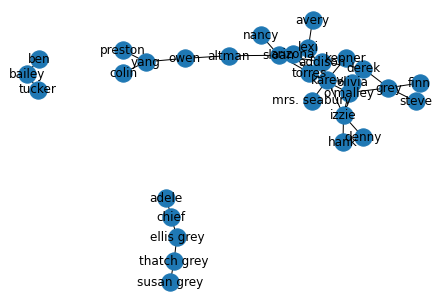

In [103]:
nx.draw(GAAdj, with_labels=True)

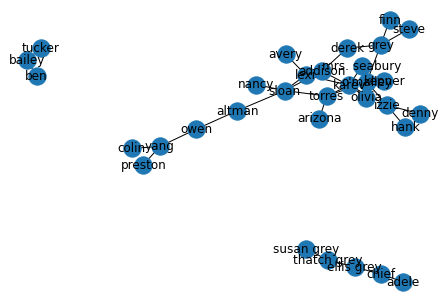

In [104]:
nx.draw_spring(GAAdj, with_labels=True)

#### Are the two graphs the same?

In [105]:
print('Edge List Graph\n', nx.info(GA))
print('Edge List Graph\n', nx.info(GAAdj))

Edge List Graph
 Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250
Edge List Graph
 Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


In [108]:
# Fancy math way? Isomorphism 
print('Isomorphic ?', nx.is_isomorphic(GA,GAAdj))

Isomorphic ? True


Edge weights got inferred from the adjacency matrix

In [110]:
print("denny edges edgelist", GA['denny'])
print("denny edges adj ", GAAdj['denny'])

denny edges edgelist {'izzie': {}}
denny edges adj  {'izzie': {'weight': 1.0}}


In [111]:
original_edgelist = sorted(nx.to_edgelist(GA))
adjacen_edgelist = sorted(nx.to_edgelist(GAAdj))
for i, edge in enumerate(original_edgelist):
    adjacen_edge = adjacen_edgelist[i]
    if edge[0] != adjacen_edge:
        print(f'Sorted edge mismatch at {i} {edge} {adjacen_edge}')
        break

SyntaxError: invalid syntax (<ipython-input-111-a937615adae1>, line 5)